# Introduction to Web Data & APIs

### Learning objectives:
* Web data collection
* APIs
* Requests
* How to work with JSON files
* And visualise the results

---

#### Web data collection

We need to understand the systems which allow us to collect data from the web. We can start by introducing the principal concepts and terminology that you will come across in this field.

---

#### APIs

Now we have a better grasp of the framework of web data collection, lets look at the specific method we will be using to collect cryptocurrency data, the Application Programming Interface.

* We are dealing with a Web-API, but what other sorts of API might exist? 
* How do Web-APIs behave? With reference to the previous section on data processing.
* What other ways do we think we might get web data of this sort, if not by using Web APIs?
* This week we are pulling financial data from the coingecko API (https://www.coingecko.com/en/api)
* But we'll need a tool to help us do that

#### Using Requests with APIs
* Requests is a Python HTTP library
* *pip install requests*
* https://2.python-requests.org/en/master/
* Use it to read in data, check for succesful connections, and parse initially

Pull in the bitcoin price history from coingecko

In [1]:
import requests

coin_list_api = 'https://api.coingecko.com/api/v3/coins/list'
coin_data = requests.get(coin_list_api)

#### Find out if the connection has been succesful or not

In [2]:
coin_data #200 indicates everything is okay! (404 means not okay!)

<Response [200]>

In [3]:
type(coin_data)

requests.models.Response

In [4]:
coin_data.text[:100] #.text gives us 

'[{"id":"01coin","symbol":"zoc","name":"01coin"},{"id":"02-token","symbol":"o2t","name":"O2 Token"},{'

#### Parse the results into a json file 

In [5]:
coin_json = coin_data.json()

In [6]:
coin_json[:10]

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '02-token', 'symbol': 'o2t', 'name': 'O2 Token'},
 {'id': '0chain', 'symbol': 'zcn', 'name': '0chain'},
 {'id': '0x', 'symbol': 'zrx', 'name': '0x'},
 {'id': '0xcert', 'symbol': 'zxc', 'name': '0xcert'},
 {'id': '0xdark', 'symbol': 'oxd', 'name': '0xDark'},
 {'id': '10m-token', 'symbol': '10mt', 'name': '10M Token'},
 {'id': '12ships', 'symbol': 'TSHP', 'name': '12Ships'},
 {'id': '1337', 'symbol': '1337', 'name': 'Elite'},
 {'id': '1irstcoin', 'symbol': 'fst', 'name': '1irstcoin'}]

In [7]:
import pandas as pd

coin_df = pd.DataFrame(coin_json)

In [8]:
coin_df.head()

,id,name,symbol
0,01coin,01coin,zoc
1,02-token,O2 Token,o2t
2,0chain,0chain,zcn
3,0x,0x,zrx
4,0xcert,0xcert,zxc


In [9]:
coin_df.set_index(coin_df['id'], inplace=True)
del coin_df['id']
coin_df.head()

,name,symbol
id,,
01coin,01coin,zoc
02-token,O2 Token,o2t
0chain,0chain,zcn
0x,0x,zrx
0xcert,0xcert,zxc


In [10]:
coin_df.loc['ethereum']

name      Ethereum
symbol         eth
Name: ethereum, dtype: object

### Now we'll grab the dogecoin price history!

In [11]:
dogecoin = 'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart?vs_currency=USD&days=120'

In [12]:
doge_coin = requests.get(dogecoin)
doge_json = doge_coin.json()
type(doge_json)

dict

In [13]:
doge_json.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [14]:
doge_prices = doge_json['prices']

In [15]:
type(doge_prices)

list

In [16]:
doge_prices[0] # hmm, we don't understand this, let's pass it to a df!

[1559001600000, 0.0031730626418975186]

In [17]:
doge_df = pd.DataFrame(doge_prices, columns=['DateTime', 'Prices'])
doge_df.head()

,DateTime,Prices
0,1559001600000,0.003173
1,1559088000000,0.003225
2,1559174400000,0.003171
3,1559260800000,0.003279
4,1559347200000,0.003540


In [18]:
doge_df.shape

(120, 2)

#### First column is probably a raw data time column! and the other is price

In [19]:
doge_df['DateTime'] = pd.to_datetime(doge_df['DateTime'], unit='ms') 
doge_df.head()

,DateTime,Prices
0,2019-05-28,0.003173
1,2019-05-29,0.003225
2,2019-05-30,0.003171
3,2019-05-31,0.003279
4,2019-06-01,0.003540


##### Calculate a rolling mean value by taking the prices column, the last 28 values(days), and calculating the average for those 28 values, finally filling the first 28 (blank) values with the value from the first mean value

In [20]:
doge_df['rolling_mean_price'] = doge_df['Prices'].rolling(28).mean().fillna(method='bfill')

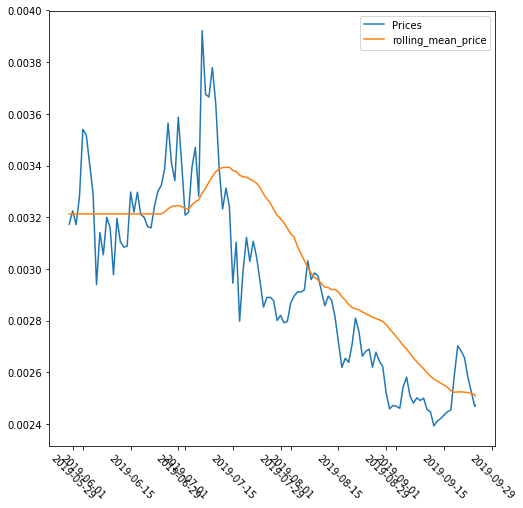

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.plot(doge_df['DateTime'], doge_df['Prices'])
plt.plot(doge_df['DateTime'], doge_df['rolling_mean_price'])

plt.xticks(rotation=-45)
plt.legend()

---

#### JSON 

JSON (JavaScript Object Notation) is a format for storing data, easy for machines (and humans) to read.

JSON looks a lot like a Python dictionary. We should revisit basic Python dictionary syntax:

* Dictionaries / keys / values
* Create a dictionary / JSON file
* Create an element in a dictionary / JSON file?
* Find an element in a dictionary / JSON file?
* Find all elements in a dcitionary / JSON file?

#### Dictionaries in python:

They have keys and values - key is like an index, except it is not ordered, it is specified with a keyword

### Keys in dictionaries have to be immutable - can't be changed! Couldn't have a list as a key


In [24]:
dictionaries = {}
my_list = []

dictionaries['my_key'] = 'my_value'
my_list.append('my_value')

In [25]:
dictionaries # we've created one value in our dictionary!

{'my_key': 'my_value'}

In [26]:
# access elements from a collection

print(dictionaries['my_key']) # calls just the value
# equivalent in a list
print(my_list[0])

my_value
my_value


In [27]:
print(dictionaries.keys(), dictionaries.values(), dictionaries.items())

dict_keys(['my_key']) dict_values(['my_value']) dict_items([('my_key', 'my_value')])


#### Can even include lists inside your dictionaries to make nested data!

In [28]:
dictionaries['my_list'] = my_list
dictionaries

{'my_key': 'my_value', 'my_list': ['my_value']}

#### We can also convert the json data into a dataframe, and save this data to disk, or load from disk again!

---

## Visualise the results
* Now we've succesfully obtained our data in a familiar format, we can start to interact with it meaningfully
* We can visualise our data
* And start to carry out time-series analysis (more on this in the afternoon)

### Let's work on finding markets data for 10 bitcoins

In [29]:
cryptocurrencies = ('bitcoin', 'ethereum', 'litecoin', 'zcash', 'dash', 'ripple', 'monero', 'neo', 'cardano', 'eos')
cryptocurrencies

('bitcoin',
 'ethereum',
 'litecoin',
 'zcash',
 'dash',
 'ripple',
 'monero',
 'neo',
 'cardano',
 'eos')

#### Let's write a function to iterate through our market data!

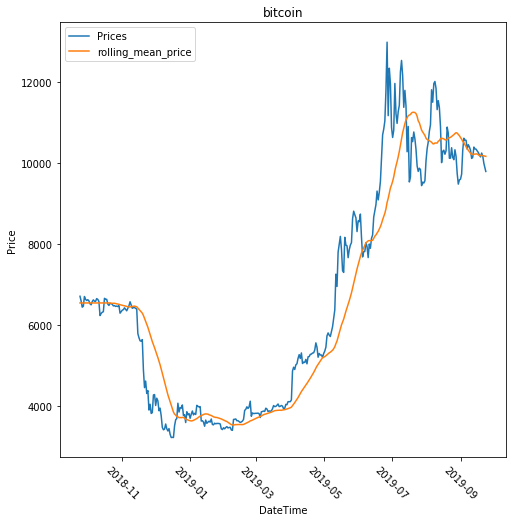

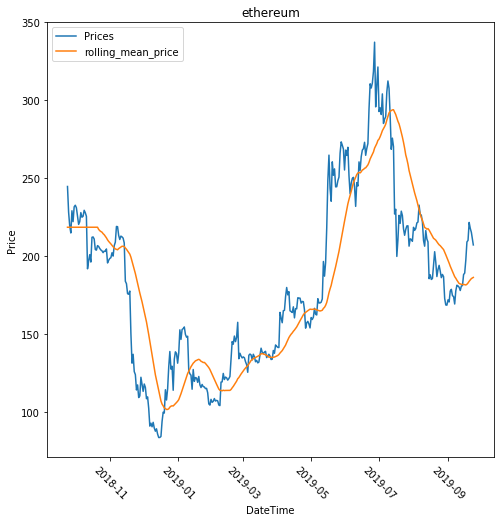

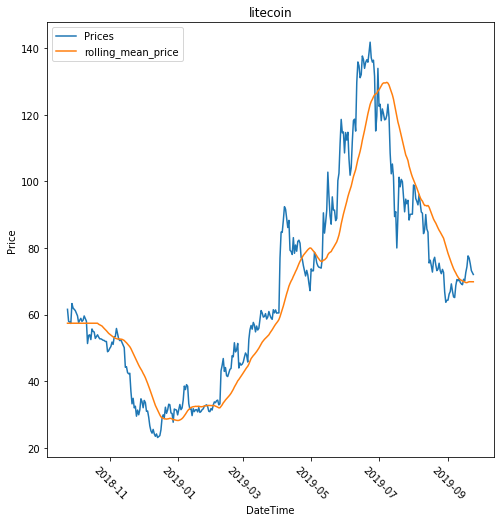

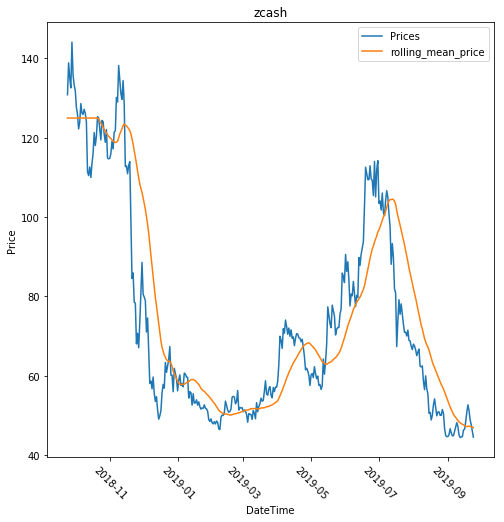

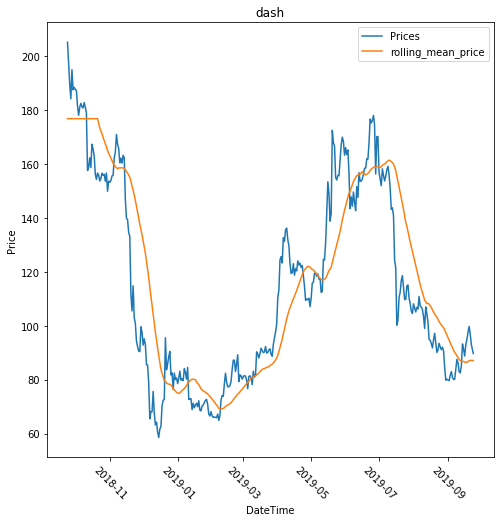

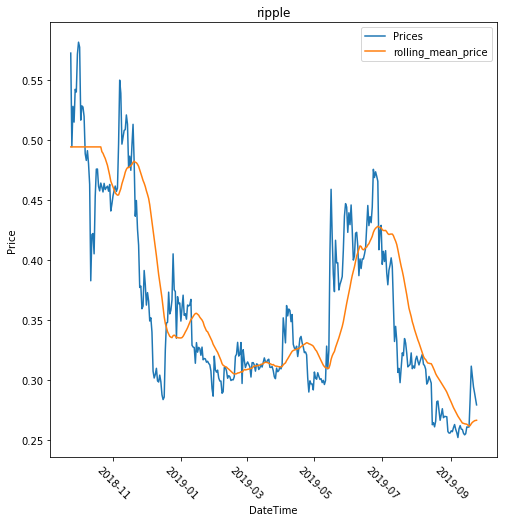

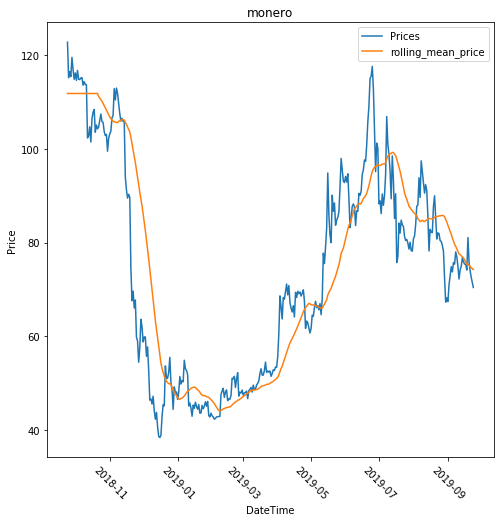

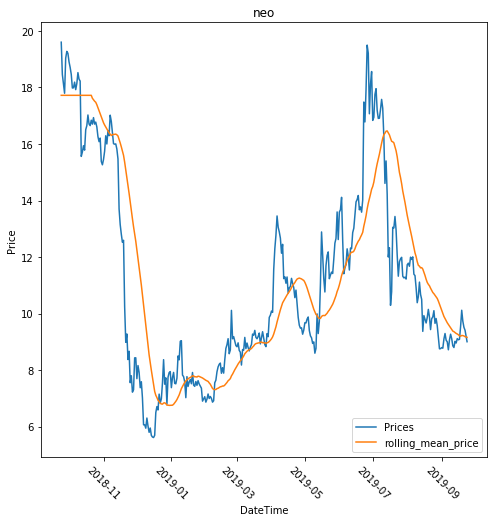

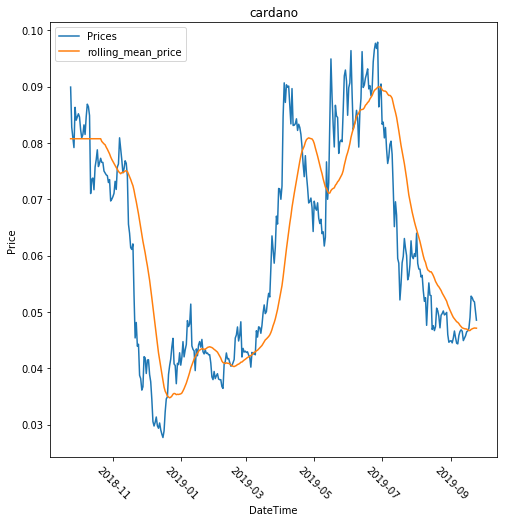

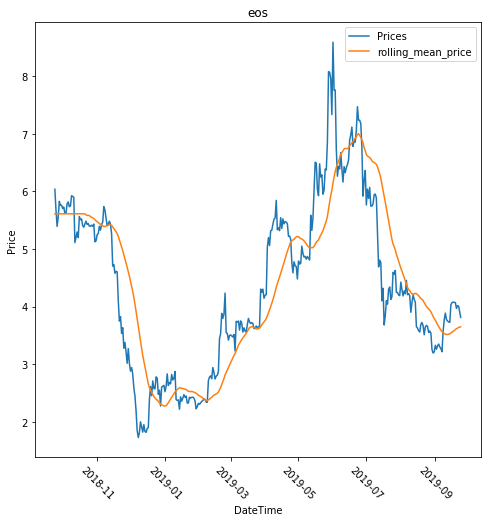

In [30]:
def market_data(cryptocurrencies):
    
    for c in cryptocurrencies:

        crypto = f'https://api.coingecko.com/api/v3/coins/{c}/market_chart?vs_currency=USD&days=365'

        crypto_request = requests.get(crypto)
        crypto_json = crypto_request.json()

        crypto_prices = crypto_json['prices']

        crypto_df = pd.DataFrame(crypto_prices, columns=['DateTime', 'Prices'])

        crypto_df['DateTime'] = pd.to_datetime(crypto_df['DateTime'], unit='ms') 
    
        crypto_df['rolling_mean_price'] = crypto_df['Prices'].rolling(28).mean().fillna(method='bfill')
    
        plt.figure(figsize=(8,8))
        plt.plot(crypto_df['DateTime'], crypto_df['Prices'])
        plt.plot(crypto_df['DateTime'], crypto_df['rolling_mean_price'])
        
        plt.xlabel('DateTime')
        plt.ylabel('Price')
        plt.title(f'{c}')
        plt.xticks(rotation=-45)
        plt.legend()
            
market_data(cryptocurrencies)

In [31]:
def market_data_single(c):
        
        crypto = f'https://api.coingecko.com/api/v3/coins/{c}/market_chart?vs_currency=USD&days=365'

        crypto_request = requests.get(crypto)
        crypto_json = crypto_request.json()

        crypto_prices = crypto_json['prices']

        crypto_df = pd.DataFrame(crypto_prices, columns=['DateTime', f'{c}_Prices'])

        crypto_df['DateTime'] = pd.to_datetime(crypto_df['DateTime'], unit='ms') 
        
        crypto_df[f'{c}_rolling_mean_price'] = crypto_df[f'{c}_Prices'].rolling(28).mean().fillna(method='bfill')
        
        return crypto_df

In [32]:
market_data_single('bitcoin').set_index('DateTime').head()

,bitcoin_Prices,bitcoin_rolling_mean_price
DateTime,,
2018-09-24,6711.029452,6545.604104
2018-09-25,6596.187313,6545.604104
2018-09-26,6441.311545,6545.604104
2018-09-27,6462.795635,6545.604104
2018-09-28,6704.704246,6545.604104


In [34]:
def market_data_multiple_coins(c):

    bob = []
    
    for c in cryptocurrencies:
    
        crypto = f'https://api.coingecko.com/api/v3/coins/{c}/market_chart?vs_currency=USD&days=365'

        crypto_request = requests.get(crypto)
        crypto_json = crypto_request.json()

        crypto_prices = crypto_json['prices']

        crypto_df = pd.DataFrame(crypto_prices, columns=['DateTime', f'{c}_Prices'])

        crypto_df['DateTime'] = pd.to_datetime(crypto_df['DateTime'], unit='ms') 

        bob.append(crypto_df)
    
    
    merged_df = bob[0].merge(bob[1], on='DateTime', how='left')
    
    merged_df = merged_df.merge(bob[2], on='DateTime', how='left')

    merged_df = merged_df.merge(bob[3], on='DateTime', how='left')

    merged_df = merged_df.merge(bob[4], on='DateTime', how='left')

    merged_df = merged_df.merge(bob[5], on='DateTime', how='left')
    
    merged_df.set_index('DateTime', inplace=True)
        
    return merged_df

In [36]:
market_data_multiple_coins(cryptocurrencies).head()

,bitcoin_Prices,ethereum_Prices,litecoin_Prices,zcash_Prices,dash_Prices,ripple_Prices
DateTime,,,,,,
2018-09-24,6711.029452,244.784795,61.574706,130.837891,205.258019,0.572513
2018-09-25,6596.187313,228.340912,57.971256,138.877729,197.769980,0.494432
2018-09-26,6441.311545,219.504344,57.764681,135.092379,189.731489,0.528123
2018-09-27,6462.795635,214.979380,57.337685,132.555310,184.262656,0.514999
2018-09-28,6704.704246,229.221959,63.309999,144.083371,195.028195,0.542321


## Feature Engineering

**In this case, X data is price and y data is price, they are the same data!**

The difference is that you're **looking at past X price to predict future y price**.

For each date you're going to give your model a series of different X info, shifted X prices, rolling means, other currencies...

So for each date you'll have a set of X data...

In [43]:
bitcoin = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=USD&days=365'

bit_coin = requests.get(bitcoin)
bit_json = bit_coin.json()

In [44]:
bitcoin_df = market_data_single('bitcoin')

In [45]:
bitcoin_df.head()

,DateTime,bitcoin_Prices,bitcoin_rolling_mean_price
0,2018-09-24,6711.029452,6545.604104
1,2018-09-25,6596.187313,6545.604104
2,2018-09-26,6441.311545,6545.604104
3,2018-09-27,6462.795635,6545.604104
4,2018-09-28,6704.704246,6545.604104


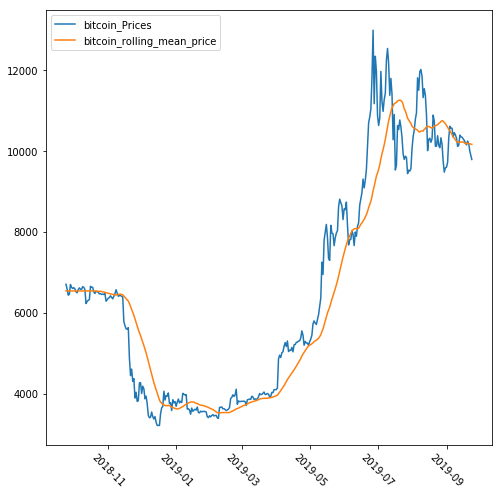

In [48]:
plt.figure(figsize=(8,8))
plt.plot(bitcoin_df['DateTime'], bitcoin_df['bitcoin_Prices'])
plt.plot(bitcoin_df['DateTime'], bitcoin_df['bitcoin_rolling_mean_price'])

plt.xticks(rotation=-45)
plt.legend()